In [20]:
%matplotlib inline
from biocrnpyler import *

import numpy as np
import pylab as plt
from matplotlib.pyplot import figure

import bokeh.io
import bokeh.plotting
from bokeh.layouts import row
from bokeh.layouts import column
bokeh.io.output_notebook()
import colorcet 



from biocrnpyler.chemical_reaction_network import Species, Reaction, ChemicalReactionNetwork

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bokeh/resources.py:107: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bokeh/_sri.json' mode='r' encoding='UTF-8'>
  _SRI_HASHES = json.load(open(join(ROOT_DIR, "_sri.json")))


Loading BokehJS ...

Chemical reaction network for the violacein pathway.

$$\text{Tryptophan (TRP)} \leftrightarrow^{VioA} \text{IPA imine}$$
$$\text{2 IPA imine}\leftrightarrow^{VioB} \text{IPA imine dimer}$$
$$\text{IPA imine dimer} \leftrightarrow^{VioE} \text{Protodeoxyviolaceinic acid (PTDVA)}$$
$$\text{Protodeoxyviolaceinic acid(PTDVA) + NADPH} \leftrightarrow^{VioD} \text{Protoviolaceinic acid(PTVA) + NADP+)}$$
$$\text{Protoviolaceinic acid (PTVA) + NADPH} \leftrightarrow^{VioC} \text{Violacein (V) + NADP}\text{        (This is the desired end-product)}$$
$$\text{Protodeoxyviolaceinic acid (PTDVA) + NADPH} \leftrightarrow^{VioC} \text{Deoxyviolacein(DV) + NADP}\text{(This is a side-reaction)}$$




In [13]:
#DNA species
d_vioA = Species("vioA", material_type = "dna")
d_vioB = Species("vioB", material_type = "dna")
d_vioE = Species("vioE", material_type = "dna")
d_vioD = Species("vioD", material_type = "dna")
d_vioC = Species("vioC", material_type = "dna")

#Transcript species
t_vioA = Species("vioA", material_type = "transcript") 
t_vioB = Species("vioB", material_type = "transcript") 
t_vioE = Species("vioE", material_type = "transcript") 
t_vioD = Species("vioD", material_type = "transcript") 
t_vioC = Species("vioC", material_type = "transcript") 

#Enzyme species
VioA = Species("VioA", material_type = "enzyme")
VioB = Species("VioB", material_type = "enzyme")
VioE = Species("VioE", material_type = "enzyme")
VioD = Species("VioD", material_type = "enzyme")
VioC = Species("VioC", material_type = "enzyme")

#Pathway organic molecule species
TRP = Species("TRP", material_type = "organic_molecule")
IPA_imine = Species("IPA_imine", material_type = "organic_molecule")
IPA_imine_dimer = Species("IPA_imine_dimer", material_type = "organic_molecule")
PTDVA = Species("PTDVA", material_type = "organic_molecule")
PTVA = Species("PTVA", material_type = "organic_molecule")
DV = Species("DV", material_type = "organic_molecule")
V = Species("V", material_type = "organic_molecule")

#Co-factors
NADP = Species("NADP", material_type = "co_factor")
NADPH = Species("NADPH", material_type = "co_factor")



#DNA assembly
G1_VioA = DNAassembly(str(d_vioA), promoter = "P", rbs = "RBS", transcript = t_vioA, protein = VioA)
G2_VioB = DNAassembly(str(d_vioB) , promoter = "P", rbs = "RBS", transcript = t_vioB, protein = VioB)
G3_VioE = DNAassembly(str(d_vioE) , promoter = "P", rbs = "RBS", transcript = t_vioE, protein = VioE)
G4_VioD = DNAassembly(str(d_vioD) , promoter = "P", rbs = "RBS", transcript = t_vioD, protein = VioD)
G5_VioC = DNAassembly(str(d_vioC) , promoter = "P", rbs = "RBS", transcript = t_vioC, protein = VioC)


VioB_kb = 10
VioB_ku = 1
VioB_kcat = 450
michalis_parameters = {("michalis_menten", "VioA", "kb"):10, ("michalis_menten", "VioA", "ku"):1, ("michalis_menten", "VioA", "kcat"):203,
                       ("michalis_menten", "VioB", "kb"):VioB_kb, ("michalis_menten", "VioB", "ku"):VioB_ku, ("michalis_menten", "VioB", "kcat"):VioB_kcat*VioB_kb/VioB_ku}    

mech_michalis = MichalisMenten()
specific_mechanisms = {mech_michalis.mechanism_type:mech_michalis}




#Enzyme assembly
E1_VioA = Enzyme(enzyme = VioA, substrate = "TRP", product = "IPA_imine", mechanisms = specific_mechanisms, parameters = michalis_parameters)
E2_VioB = MultiEnzyme(enzyme = VioB, substrates = ["IPA_imine", "IPA_imine"], products = ["IPA_imine_dimer"], mechanisms = specific_mechanisms, parameters = michalis_parameters)
E3_VioE = Enzyme(enzyme = VioE, substrate = "IPA_imine_dimer", product = "PTDVA")
E4_VioD = MultiEnzyme(enzyme = VioD, substrates = ["PTDVA", "NADPH"], products = ["PTVA", "NADP"])
E5_VioC = MultiEnzyme(enzyme = VioC, substrates = ["PTVA", "NADPH"], products = ["V", "NADP"])
E5_VioC_side = MultiEnzyme(enzyme = VioC, substrates =["PTDVA", "NADPH"], products = ["DV", "NADP"])

#create a transcription and translation Mechanisms. 
mech_tx = SimpleTranscription()
mech_tl = SimpleTranslation()

#Enzyme mechanisms
mech_cat = BasicCatalysis()

#Mechanisms dictionary
default_mechanisms = {mech_tx.mechanism_type:mech_tx, mech_tl.mechanism_type:mech_tl, mech_cat.mechanism_type:mech_cat}

#Parameters
default_parameters = {"kb":100, "ku":10, "ktx":.5, "ktl":2, "kcat":100}



M1 = TxTlExtract("e coli extract", components = [G1_VioA, G2_VioB, G3_VioE, G4_VioD, G5_VioC, E1_VioA, E2_VioB, E3_VioE, E4_VioD, E5_VioC, E5_VioC_side], parameters = default_parameters ,parameter_file = "default_parameters.txt")
CRN1 = M1.compile_crn()

_ = CRN1.write_sbml_file('violacein_albert.xml')

print(repr(M1),"\n", CRN1.pretty_print(show_attributes = True, show_material = True, show_rates = True),"\n\n")


TxTlExtract: e coli extract
Components = [
	DNAassembly: dna_vioA
	DNAassembly: dna_vioB
	DNAassembly: dna_vioE
	DNAassembly: dna_vioD
	DNAassembly: dna_vioC
	Enzyme: VioA
	MultiEnzyme: VioB
	Enzyme: VioE
	MultiEnzyme: VioD
	MultiEnzyme: VioC
	MultiEnzyme: VioC
	Protein: RNAP
	Protein: Ribo
	Protein: RNAase ]
Mechanisms = {
	transcription:transcription_mm
	translation:translation_mm
	rna_degredation:rna_degredation_mm
	catalysis:michalis_menten
	binding:one_step_binding }
Global Mechanisms = { } 
 Species (48) = {0. protein[RNAase], 1. protein[RNAP], 2. complex[dna[dna_vioA]:protein[RNAP]], 3. dna[dna_vioA], 4. transcript[vioA], 5. complex[protein[Ribo]:transcript[vioA]], 6. complex[protein[RNAase]:transcript[vioA]], 7. enzyme[VioA], 8. protein[Ribo], 9. complex[protein[Ribo]:transcript[vioB]], 10. enzyme[VioB], 11. complex[protein[RNAase]:transcript[vioB]], 12. dna[dna_vioB], 13. transcript[vioB], 14. complex[dna[dna_vioB]:protein[RNAP]], 15. dna[dna_vioE], 16. complex[dna[dna_vioE]:p

In [23]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

trp = 10
dna_conc = 10
nadph = 1
x0 = {"TRP":trp, "dna_dna_vioA":dna_conc, "dna_dna_vioB":dna_conc, "dna_dna_vioE":dna_conc, "dna_dna_vioD":dna_conc, "dna_dna_vioC":dna_conc, "NADPH":nadph}


      
      
R1 = CRN1.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.plot(timepoints, R1["TRP"], color = 'blue', lw = 4, label = 'Trp')
#plt.plot(timepoints, R1["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
#plt.plot(timepoints, R1["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
#plt.plot(timepoints, R1["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
#plt.plot(timepoints, R1["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')
# plt.plot(timepoints, R1["NADPH"], color = 'black', lw = 4, label = 'NADPH')
# plt.plot(timepoints, R1["NADP"], color = 'blue', lw = 4, label = 'NADP')
# plt.plot(timepoints, R1["DV"], color = 'yellow', lw = 4, label = 'DV')
# plt.plot(timepoints, R1["V"] , color = "red" , lw = 4, label = 'V')
# plt.legend(fontsize = 15)


colors = colorcet.b_glasbey_category10
p2 = bokeh.plotting.figure(width = 600, height = 350,
                          title = 'Violacein with NADPH Regeneration, NADPH_0 = 1',
                          y_axis_label = 'Concentration (mM)',
                          x_axis_label = 'Time')

p2.line(timepoints,R1['NADPH'], color = colors[0], line_width = 3, legend_label = 'NADPH' )
p2.line(timepoints,R1['NADP'], color = colors[1], line_width = 3, legend_label = 'NADP' )
p2.line(timepoints,R1['DV'], color = colors[2], line_width = 3, legend_label = 'DV' )
p2.line(timepoints,R1['V'], color = colors[3], line_width = 3, legend_label = 'V' )
bokeh.io.show(p2)


# plt.xlim(0, 20)
# plt.ylim(0, 10)
# plt.title('Concentration of pathway intermediates, NADPH = 1', size = "15")
# plt.xlabel("Time", fontsize = "15")
# plt.ylabel("Concentration", fontsize = "15");
# plt.show()

<Figure size 640x480 with 0 Axes>

In [9]:

M2 = TxTlExtract("e coli extract", components = [G1_VioA, G2_VioB, G3_VioE, G4_VioD, G5_VioC, E1_VioA, E2_VioB, E3_VioE, E4_VioD, E5_VioC], parameters = default_parameters ,parameter_file = "default_parameters.txt")
CRN2 = M2.compile_crn()
#print(repr(M2),"\n", CRN2.pretty_print(show_attributes = True, show_material = True, show_rates = True),"\n\n")

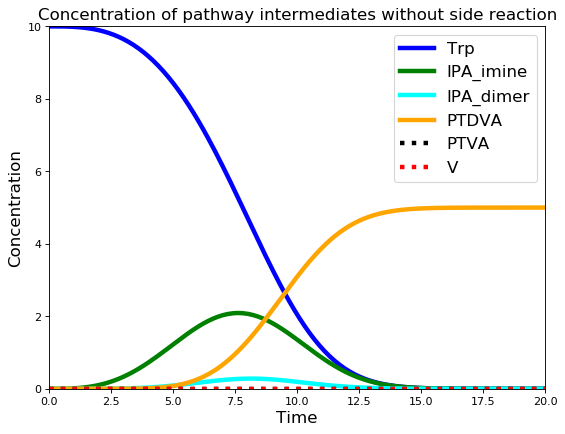

In [10]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

trp = 10
dna_conc = 10
x0 = {"TRP":trp, "dna_dna_vioA":dna_conc, "dna_dna_vioB":dna_conc, "dna_dna_vioE":dna_conc, "dna_dna_vioD":dna_conc, "dna_dna_vioC":dna_conc}

      
R2 = CRN2.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(timepoints, R2["TRP"], color = 'blue', lw = 4, label = 'Trp')
plt.plot(timepoints, R2["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
plt.plot(timepoints, R2["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
plt.plot(timepoints, R2["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
plt.plot(timepoints, R2["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')


#plt.plot(timepoints, "DV", color = 'yellow', lw = 4, label = 'DV')
plt.plot(timepoints, R2["V"], ":" , color = "red" , lw = 4, label = 'V')
plt.legend(fontsize = 15)


plt.xlim(0, 20)
plt.ylim(0, 10)
plt.title('Concentration of pathway intermediates without side reaction', size = "15")
plt.xlabel("Time", fontsize = "15")
plt.ylabel("Concentration", fontsize = "15");
plt.show()

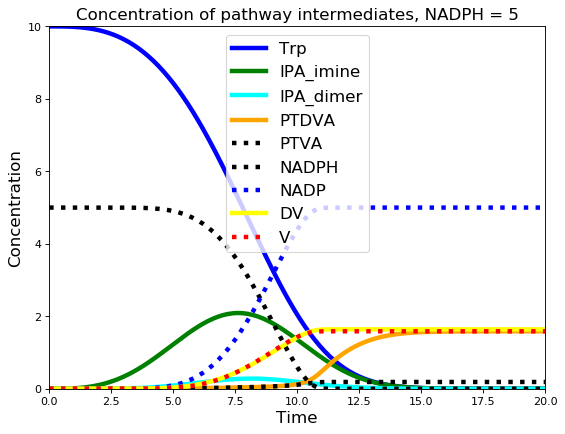

In [11]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

trp = 10
dna_conc = 10
nadph = 5
x0 = {"TRP":trp, "dna_dna_vioA":dna_conc, "dna_dna_vioB":dna_conc, "dna_dna_vioE":dna_conc, "dna_dna_vioD":dna_conc, "dna_dna_vioC":dna_conc, "NADPH":nadph}


      
      
R1 = CRN1.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(timepoints, R1["TRP"], color = 'blue', lw = 4, label = 'Trp')
plt.plot(timepoints, R1["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
plt.plot(timepoints, R1["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
plt.plot(timepoints, R1["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
plt.plot(timepoints, R1["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')
plt.plot(timepoints, R1["NADPH"], ":", color = 'black', lw = 4, label = 'NADPH')
plt.plot(timepoints, R1["NADP"], ":", color = 'blue', lw = 4, label = 'NADP')
plt.plot(timepoints, R1["DV"], color = 'yellow', lw = 4, label = 'DV')
plt.plot(timepoints, R1["V"], ":" , color = "red" , lw = 4, label = 'V')
plt.legend(fontsize = 15)


plt.xlim(0, 20)
plt.ylim(0, 10)
plt.title('Concentration of pathway intermediates, NADPH = 5', size = "15")
plt.xlabel("Time", fontsize = "15")
plt.ylabel("Concentration", fontsize = "15");
plt.show()

In [21]:
# Define initial conditions for Rheostat + ATP Leak
timepoints = np.linspace(0, 100, 1000)

trp = 10
dna_conc = 10
nadph = 10
x0 = {"TRP":trp, "dna_dna_vioA":dna_conc, "dna_dna_vioB":dna_conc, "dna_dna_vioE":dna_conc, "dna_dna_vioD":dna_conc, "dna_dna_vioC":dna_conc, "NADPH":nadph}


      
      
R1 = CRN1.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# # plt.plot(timepoints, R1["TRP"], color = 'blue', lw = 4, label = 'Trp')
# # plt.plot(timepoints, R1["IPA_imine"], color = 'green', lw = 4, label = 'IPA_imine')
# # plt.plot(timepoints, R1["IPA_imine_dimer"], color = 'cyan', lw = 4, label = 'IPA_dimer')
# # plt.plot(timepoints, R1["PTDVA"], color = 'orange', lw = 4, label = 'PTDVA')
# # plt.plot(timepoints, R1["PTVA"], ":", color = 'black', lw = 4, label = 'PTVA')
# plt.plot(timepoints, R1["NADPH"], ":", color = 'black', lw = 4, label = 'NADPH')
# plt.plot(timepoints, R1["NADP"], ":", color = 'blue', lw = 4, label = 'NADP')
# plt.plot(timepoints, R1["DV"], color = 'yellow', lw = 4, label = 'DV')
# plt.plot(timepoints, R1["V"], ":" , color = "red" , lw = 4, label = 'V')
# plt.legend(fontsize = 15)

colors = colorcet.b_glasbey_category10
p1 = bokeh.plotting.figure(width = 600, height = 350,
                          title = 'Violacein with NADPH Regeneration, NADPH_0 = 10',
                          y_axis_label = 'Concentration (mM)',
                          x_axis_label = 'Time')

p1.line(timepoints,R1['NADPH'], color = colors[0], line_width = 3, legend_label = 'NADPH' )
p1.line(timepoints,R1['NADP'], color = colors[1], line_width = 3, legend_label = 'NADP' )
p1.line(timepoints,R1['DV'], color = colors[2], line_width = 3, legend_label = 'DV' )
p1.line(timepoints,R1['V'], color = colors[3], line_width = 3, legend_label = 'V' )
bokeh.io.show(p1)

# plt.xlim(0, 20)
# plt.ylim(0, 10)
# plt.title('Concentration of pathway intermediates, NADPH = 10', size = "15")
# plt.xlabel("Time", fontsize = "15")
# plt.ylabel("Concentration", fontsize = "15");
# plt.show()